# chapter2

In [1]:
import os
import pandas as pd

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26580\3571106454.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import matplotlib.pyplot as plot
import numpy as np

In [3]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header =None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


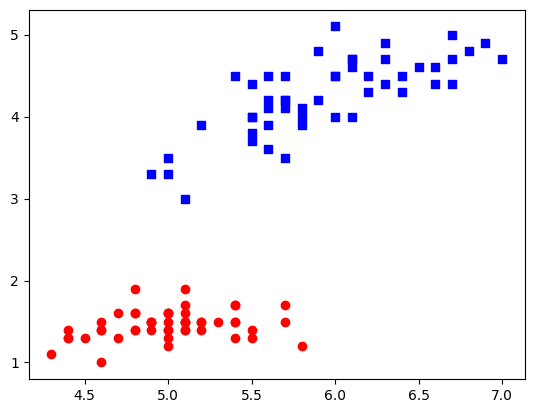

In [4]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

x = df.iloc[0:100, [0, 2]].values

plot.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')

plot.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='s', label='Versicolor')
plot.show()

In [5]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=50, eta0=0.1, random_state=42)
ppn.fit(x, y)


Perceptron(eta0=0.1, max_iter=50, random_state=42)

In [6]:
class Perceptron:
    def __init__(self, eta = 0.01, n_iter = 40, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=x.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_

    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0 , 1, 0)

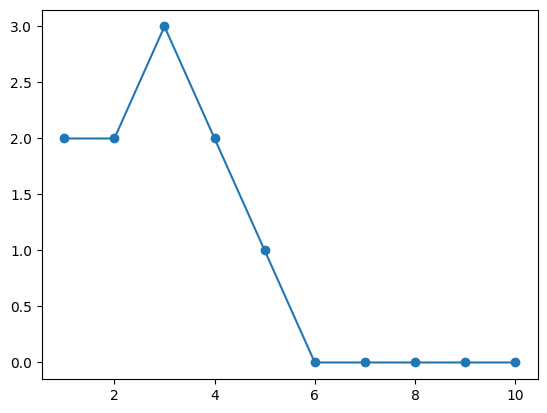

In [7]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(x, y)
plot.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plot.show()

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x, y, classifier , resolution = 0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min()-1, x[:,0].max()+1
    x2_min, x2_max = x[:,1].min()-1, x[:,1].max()+1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plot.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plot.xlim(xx1.min(), xx1.max())
    plot.ylim(xx2.min(), xx2.max())
    for idx, cl, in enumerate(np.unique(y)):
        plot.scatter(x = x[y == cl, 0],
                     y = x[y == cl, 1],
                     alpha=0.8,
                     c = colors[idx + 1],
                     marker=markers[idx + 1],
                     label=f'class {cl}',
                     edgecolors='black')

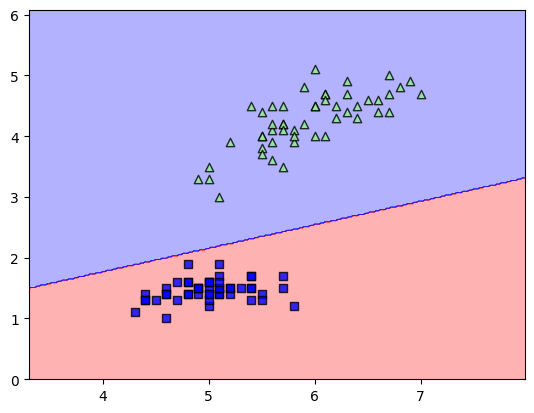

In [21]:
plot_decision_regions(x, y, classifier=ppn)
plot.show()

# Adaline

In [31]:
class Adaline :
    def __init__(self, eta = 0.01, n_iter = 40, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=x.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for  _ in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = y - output
            self.w_ += self.eta * 2.0 * x.T.dot(errors)/x.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def activation(self, x):
        return x
    
    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_
    def predict(self, x) :
        return np.where(self.activation(self.net_input(x)) >= 0.5 , 1, 0)

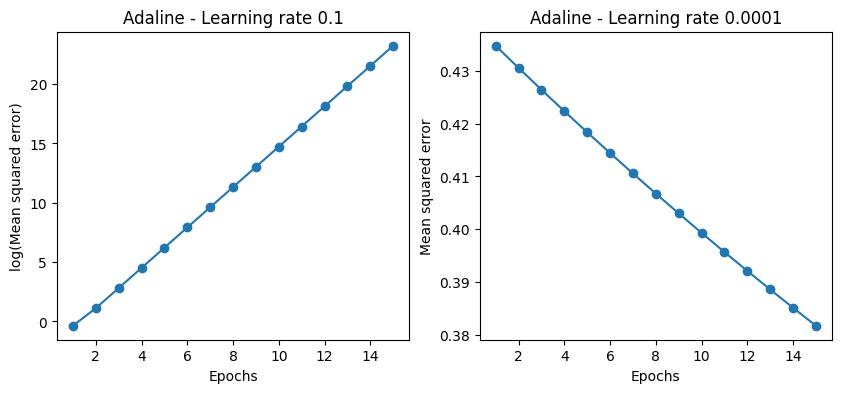

In [32]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adaline(n_iter=15, eta=0.1).fit(x, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = Adaline(n_iter=15, eta=0.0001).fit(x, y)
ax[1].plot(range(1, len(ada2.losses_) + 1),
ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plot.show()

In [33]:
x_normal = np.copy(x)
x_normal[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x_normal[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()
ada = Adaline(n_iter=20, eta = 0.5)
ada.fit(x_normal, y)

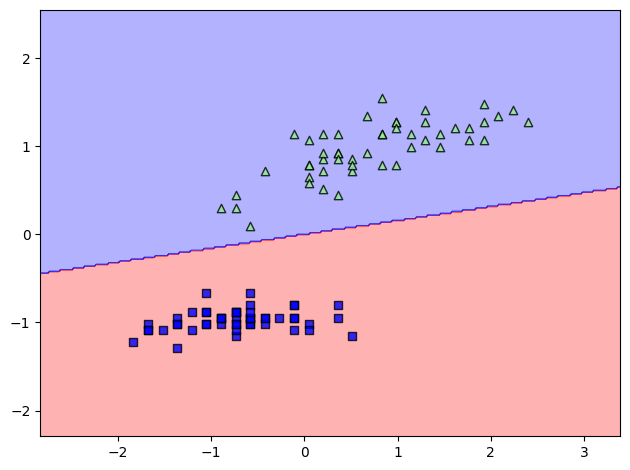

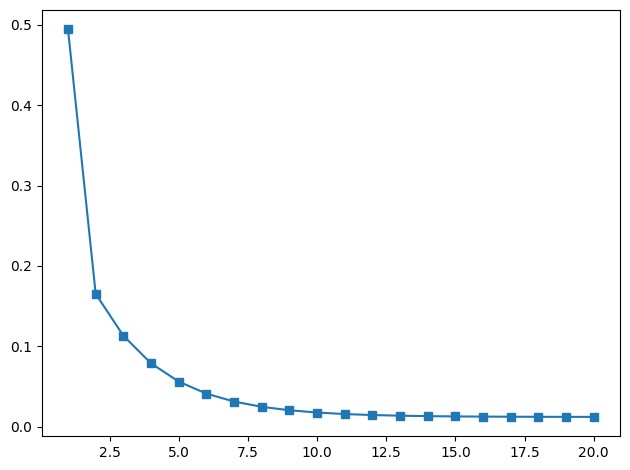

In [36]:
plot_decision_regions(x_normal, y, classifier=ada)
plot.tight_layout()
plot.show()
plot.plot(range(1, len(ada.losses_) + 1), ada.losses_, marker='s')
plot.tight_layout()
plot.show()

In [39]:
class AdalineSGD :
    def __init__(self, eta = 0.01, n_iter = 40, shuffle = True, random_state = None):
        self.n_iter = n_iter
        self.eta = eta
        self.random_state = random_state
        self.shuffle = shuffle
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
        size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
    def _shuffle(self, x, y):
        r = self.rgen.permutation(len(y))
        return x[r], y[r]

    def fit(self, x, y):
        self._initialize_weights(x.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                x_sh, y_sh = self._shuffle(x, y)
            losses = []
            for xi, target in zip(x_sh, y_sh):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self
    
    def partial_fit(self, x, y):
        if not self.w_initialized:
            self._initialize_weights(x.shape[1])
        
        if y.ravel().shape[0] > 1 :
            for xi, target in zip(x, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x, y)
        return self

    def _update_weights(self, x, y):
        output = self.activation(self.net_input(x))
        error = y - output
        self.w_ += self.eta * 2.0 * x * error
        self.b_ += self.eta * 2.0 * error
        loss = error ** 2
        return loss
    
    def net_input(self, x):
        return np.dot(x, self.w_) + self.b_
    
    def activation(self, x):
        return x
    
    def predict(self, x):
        return np.where(self.activation(self.net_input(x)) >= 0.5, 1, 0)



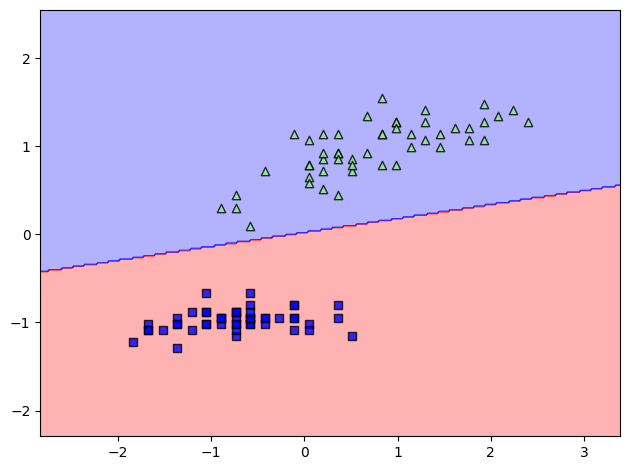

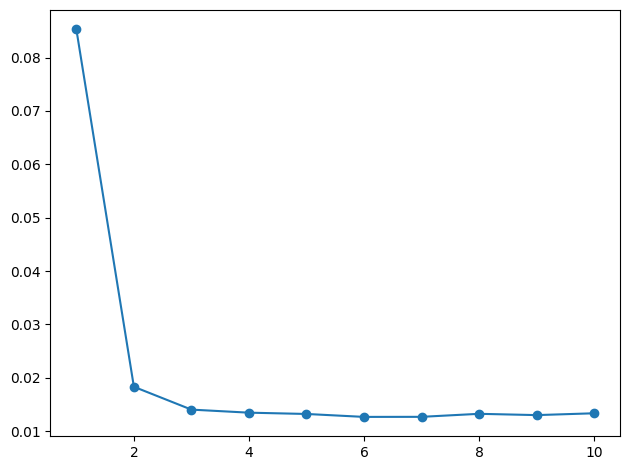

In [40]:
ada_SGD = AdalineSGD(n_iter = 10, eta=0.02, random_state = 1)
ada_SGD.fit(x_normal, y)
plot_decision_regions(x_normal, y, ada_SGD)
plot.tight_layout()
plot.show()
plot.plot(range(1, len(ada_SGD.losses_) + 1), ada_SGD.losses_, marker='o')
plot.tight_layout()
plot.show()